## Importing Libraries

In [4]:
import math
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import plotly_express as px
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [5]:
# Linear algebra
import numpy as np
# Data processing
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

# # Input data files are available in the "../input/" directory.
# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

In [6]:
# Read the dataset from a CSV file
netflix_data = pd.read_csv('Netflix_Dataset.csv')
netflix_data

,Title,Genre,Tags,Languages,Country Availability,Runtime,Director,Writer,Actors,View Rating,...,Awards Nominated For,Boxoffice,Release Date,Netflix Release Date,Production House,Netflix Link,Summary,Series or Movie,IMDb Votes,Image
0,Lets Fight Ghost,"Crime, Drama, Fantasy, Horror, Romance","Comedy Programmes,Romantic TV Comedies,Horror ...","Swedish, Spanish",Thailand,< 30 minutes,Tomas Alfredson,John Ajvide Lindqvist,"Lina Leandersson, Kåre Hedebrant, Per Ragnar, ...",R,...,57.0,"$21,22,065",12-Dec-08,04-03-21,"Canal+, Sandrew Metronome",https://www.netflix.com/watch/81415947,A med student with a supernatural gift tries t...,Series,205926.0,https://occ-0-4708-64.1.nflxso.net/dnm/api/v6/...
1,HOW TO BUILD A GIRL,Comedy,"Dramas,Comedies,Films Based on Books,British",English,Canada,1-2 hour,Coky Giedroyc,Caitlin Moran,"Cleo, Paddy Considine, Beanie Feldstein, Dónal...",R,...,NaN,"$70,632",08-May-20,04-03-21,"Film 4, Monumental Pictures, Lionsgate",https://www.netflix.com/watch/81041267,"When nerdy Johanna moves to London, things get...",Movie,2838.0,https://occ-0-1081-999.1.nflxso.net/dnm/api/v6...
2,The Con-Heartist,"Comedy, Romance","Romantic Comedies,Comedies,Romantic Films,Thai...",Thai,Thailand,> 2 hrs,Mez Tharatorn,"Pattaranad Bhiboonsawade, Mez Tharatorn, Thods...","Kathaleeya McIntosh, Nadech Kugimiya, Pimchano...",NaN,...,NaN,NaN,03-Dec-20,03-03-21,NaN,https://www.netflix.com/watch/81306155,After her ex-boyfriend cons her out of a large...,Movie,131.0,https://occ-0-2188-64.1.nflxso.net/dnm/api/v6/...
3,Gleboka woda,Drama,"TV Dramas,Polish TV Shows,Social Issue TV Dramas",Polish,Poland,< 30 minutes,NaN,NaN,"Katarzyna Maciag, Piotr Nowak, Marcin Dorocins...",NaN,...,4.0,NaN,14-Jun-11,03-03-21,NaN,https://www.netflix.com/watch/81307527,A group of social welfare workers led by their...,Series,47.0,https://occ-0-2508-2706.1.nflxso.net/dnm/api/v...
4,Only a Mother,Drama,"Social Issue Dramas,Dramas,Movies Based on Boo...",Swedish,"Lithuania,Poland,France,Italy,Spain,Greece,Bel...",1-2 hour,Alf Sjöberg,Ivar Lo-Johansson,"Hugo Björne, Eva Dahlbeck, Ulf Palme, Ragnar F...",NaN,...,1.0,NaN,31-Oct-49,03-03-21,NaN,https://www.netflix.com/watch/81382068,An unhappily married farm worker struggling to...,Movie,88.0,https://occ-0-2851-41.1.nflxso.net/dnm/api/v6/...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9398,13 Going on 30,"Comedy, Fantasy, Romance","Romantic Comedies,Comedies,Romantic Films,Roma...","English, Portuguese","Hungary,Lithuania,Romania,United Kingdom,Belgi...",1-2 hour,Gary Winick,"Josh Goldsmith, Cathy Yuspa","Andy Serkis, Jennifer Garner, Mark Ruffalo, Ju...",PG-13,...,11.0,"$5,72,31,747",23-Apr-04,14-04-15,"Revolution Studios, Thirteen Productions LLC",https://www.netflix.com/watch/60034573,When a geeky teens birthday party goes awry an...,Movie,167842.0,https://occ-0-2851-38.1.nflxso.net/dnm/api/v6/...
9399,LIFE 2.0,Documentary,"Social & Cultural Documentaries,Biographical D...",English,"Hungary,Lithuania,India,Australia,United Kingd...",1-2 hour,Jason Spingarn-Koff,NaN,Teasa Copprue,NotRated,...,NaN,NaN,22-Jan-10,14-04-15,NaN,https://www.netflix.com/watch/70129457,Computer users across the globe log onto the v...,Movie,878.0,https://occ-0-2851-38.1.nflxso.net/dnm/api/v6/...
9400,Brand New Day,"Documentary, Music","Australian Comedies,Romantic Comedies,Australi...",English,Australia,1-2 hour,Amos Gitai,NaN,"Ryuichi Sakamoto, Clem Burke, Annie Lennox, Pa...",NaN,...,NaN,NaN,17-Sep-88,14-04-15,NaN,https://www.netflix.com/watch/70125340,In an idyllic port town on Australias west coa...,Movie,14.0,http://cdn1.nflximg.net/images/5543/12045543.jpg
9401,Daniel Arends: Blessuretijd,Comedy,"Stand-up Comedy,International Movies,Comedies",Dutch,Belgium,1-2 hour,Doesjka van Hoogdalem,Daniël Arends,Daniël Arends,NaN,...,NaN,NaN,13-Jan-12,14-04-15,NaN,https://www.netflix.com/watch/70281233,"In his third show, Daniël Arends argues that g...",Movie,174.0,http://occ-0-768-769.1.nflxso.ne

In [7]:
# Check for missing values in the dataset
netflix_data.isnull().sum()

Title                      0
Genre                      0
Tags                      37
Languages                170
Country Availability      11
Runtime                    1
Director                2304
Writer                  1807
Actors                   111
View Rating             2590
IMDb Score                 8
Awards Received         4190
Awards Nominated For    3040
Boxoffice               5660
Release Date             207
Netflix Release Date       0
Production House        5021
Netflix Link               0
Summary                    0
Series or Movie            0
IMDb Votes                10
Image                      0
dtype: int64

In [8]:
# Fill missing values in the 'Tags' column with values from the 'Genre' column
netflix_data['Tags'].fillna(netflix_data['Genre'], inplace=True)

In [9]:
netflix_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9403 entries, 0 to 9402
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Title                 9403 non-null   object 
 1   Genre                 9403 non-null   object 
 2   Tags                  9403 non-null   object 
 3   Languages             9233 non-null   object 
 4   Country Availability  9392 non-null   object 
 5   Runtime               9402 non-null   object 
 6   Director              7099 non-null   object 
 7   Writer                7596 non-null   object 
 8   Actors                9292 non-null   object 
 9   View Rating           6813 non-null   object 
 10  IMDb Score            9395 non-null   float64
 11  Awards Received       5213 non-null   float64
 12  Awards Nominated For  6363 non-null   float64
 13  Boxoffice             3743 non-null   object 
 14  Release Date          9196 non-null   object 
 15  Netflix Release Date 

In [10]:
# Fill missing values in the 'Languages' column with 'English'
netflix_data['Languages'].fillna('English', inplace=True)

In [11]:
netflix_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9403 entries, 0 to 9402
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Title                 9403 non-null   object 
 1   Genre                 9403 non-null   object 
 2   Tags                  9403 non-null   object 
 3   Languages             9403 non-null   object 
 4   Country Availability  9392 non-null   object 
 5   Runtime               9402 non-null   object 
 6   Director              7099 non-null   object 
 7   Writer                7596 non-null   object 
 8   Actors                9292 non-null   object 
 9   View Rating           6813 non-null   object 
 10  IMDb Score            9395 non-null   float64
 11  Awards Received       5213 non-null   float64
 12  Awards Nominated For  6363 non-null   float64
 13  Boxoffice             3743 non-null   object 
 14  Release Date          9196 non-null   object 
 15  Netflix Release Date 

In [12]:
# Country Availability 

In [13]:
# Fill missing values in the 'Country Availability' column with 'ALL'
netflix_data['Country Availability'].fillna('ALL', inplace=True)

In [14]:
netflix_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9403 entries, 0 to 9402
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Title                 9403 non-null   object 
 1   Genre                 9403 non-null   object 
 2   Tags                  9403 non-null   object 
 3   Languages             9403 non-null   object 
 4   Country Availability  9403 non-null   object 
 5   Runtime               9402 non-null   object 
 6   Director              7099 non-null   object 
 7   Writer                7596 non-null   object 
 8   Actors                9292 non-null   object 
 9   View Rating           6813 non-null   object 
 10  IMDb Score            9395 non-null   float64
 11  Awards Received       5213 non-null   float64
 12  Awards Nominated For  6363 non-null   float64
 13  Boxoffice             3743 non-null   object 
 14  Release Date          9196 non-null   object 
 15  Netflix Release Date 

### Handling Missing Values for Runtime, IMDb Score, IMDb Votes, Writer, View Rating, Awards Received, Summary

In [15]:
# Fill missing values in the 'Runtime' column with the mode (most frequent value)
netflix_data['Runtime'].fillna(netflix_data['Runtime'].mode()[0], inplace=True)

In [16]:
netflix_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9403 entries, 0 to 9402
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Title                 9403 non-null   object 
 1   Genre                 9403 non-null   object 
 2   Tags                  9403 non-null   object 
 3   Languages             9403 non-null   object 
 4   Country Availability  9403 non-null   object 
 5   Runtime               9403 non-null   object 
 6   Director              7099 non-null   object 
 7   Writer                7596 non-null   object 
 8   Actors                9292 non-null   object 
 9   View Rating           6813 non-null   object 
 10  IMDb Score            9395 non-null   float64
 11  Awards Received       5213 non-null   float64
 12  Awards Nominated For  6363 non-null   float64
 13  Boxoffice             3743 non-null   object 
 14  Release Date          9196 non-null   object 
 15  Netflix Release Date 

In [17]:
netflix_data.isnull().sum()

Title                      0
Genre                      0
Tags                       0
Languages                  0
Country Availability       0
Runtime                    0
Director                2304
Writer                  1807
Actors                   111
View Rating             2590
IMDb Score                 8
Awards Received         4190
Awards Nominated For    3040
Boxoffice               5660
Release Date             207
Netflix Release Date       0
Production House        5021
Netflix Link               0
Summary                    0
Series or Movie            0
IMDb Votes                10
Image                      0
dtype: int64

In [18]:
#IMDB SCORE

In [19]:
# Fill missing values in the 'IMDb Score' column with the mean and round to one decimal place
netflix_data['IMDb Score'].fillna(netflix_data['IMDb Score'].mean(), inplace=True)
netflix_data['IMDb Score'] = netflix_data['IMDb Score'].round(1)

In [20]:
netflix_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9403 entries, 0 to 9402
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Title                 9403 non-null   object 
 1   Genre                 9403 non-null   object 
 2   Tags                  9403 non-null   object 
 3   Languages             9403 non-null   object 
 4   Country Availability  9403 non-null   object 
 5   Runtime               9403 non-null   object 
 6   Director              7099 non-null   object 
 7   Writer                7596 non-null   object 
 8   Actors                9292 non-null   object 
 9   View Rating           6813 non-null   object 
 10  IMDb Score            9403 non-null   float64
 11  Awards Received       5213 non-null   float64
 12  Awards Nominated For  6363 non-null   float64
 13  Boxoffice             3743 non-null   object 
 14  Release Date          9196 non-null   object 
 15  Netflix Release Date 

In [21]:
netflix_data.head()

,Title,Genre,Tags,Languages,Country Availability,Runtime,Director,Writer,Actors,View Rating,...,Awards Nominated For,Boxoffice,Release Date,Netflix Release Date,Production House,Netflix Link,Summary,Series or Movie,IMDb Votes,Image
0,Lets Fight Ghost,"Crime, Drama, Fantasy, Horror, Romance","Comedy Programmes,Romantic TV Comedies,Horror ...","Swedish, Spanish",Thailand,< 30 minutes,Tomas Alfredson,John Ajvide Lindqvist,"Lina Leandersson, Kåre Hedebrant, Per Ragnar, ...",R,...,57.0,"$21,22,065",12-Dec-08,04-03-21,"Canal+, Sandrew Metronome",https://www.netflix.com/watch/81415947,A med student with a supernatural gift tries t...,Series,205926.0,https://occ-0-4708-64.1.nflxso.net/dnm/api/v6/...
1,HOW TO BUILD A GIRL,Comedy,"Dramas,Comedies,Films Based on Books,British",English,Canada,1-2 hour,Coky Giedroyc,Caitlin Moran,"Cleo, Paddy Considine, Beanie Feldstein, Dónal...",R,...,NaN,"$70,632",08-May-20,04-03-21,"Film 4, Monumental Pictures, Lionsgate",https://www.netflix.com/watch/81041267,"When nerdy Johanna moves to London, things get...",Movie,2838.0,https://occ-0-1081-999.1.nflxso.net/dnm/api/v6...
2,The Con-Heartist,"Comedy, Romance","Romantic Comedies,Comedies,Romantic Films,Thai...",Thai,Thailand,> 2 hrs,Mez Tharatorn,"Pattaranad Bhiboonsawade, Mez Tharatorn, Thods...","Kathaleeya McIntosh, Nadech Kugimiya, Pimchano...",NaN,...,NaN,NaN,03-Dec-20,03-03-21,NaN,https://www.netflix.com/watch/81306155,After her ex-boyfriend cons her out of a large...,Movie,131.0,https://occ-0-2188-64.1.nflxso.net/dnm/api/v6/...
3,Gleboka woda,Drama,"TV Dramas,Polish TV Shows,Social Issue TV Dramas",Polish,Poland,< 30 minutes,NaN,NaN,"Katarzyna Maciag, Piotr Nowak, Marcin Dorocins...",NaN,...,4.0,NaN,14-Jun-11,03-03-21,NaN,https://www.netflix.com/watch/81307527,A group of social welfare workers led by their...,Series,47.0,https://occ-0-2508-2706.1.nflxso.net/dnm/api/v...
4,Only a Mother,Drama,"Social Issue Dramas,Dramas,Movies Based on Boo...",Swedish,"Lithuania,Poland,France,Italy,Spain,Greece,Bel...",1-2 hour,Alf Sjöberg,Ivar Lo-Johansson,"Hugo Björne, Eva Dahlbeck, Ulf Palme, Ragnar F...",NaN,...,1.0,NaN,31-Oct-49,03-03-21,NaN,https://www.netflix.com/watch/81382068,An unhappily married farm worker struggling to...,Movie,88.0,https://occ-0-2851-41.1.nflxso.net/dnm/api/v6/...


In [22]:
# Fill missing values in the 'IMDb Votes' column with the median
netflix_data['IMDb Votes'].fillna(netflix_data['IMDb Votes'].median(), inplace=True)

In [23]:
netflix_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9403 entries, 0 to 9402
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Title                 9403 non-null   object 
 1   Genre                 9403 non-null   object 
 2   Tags                  9403 non-null   object 
 3   Languages             9403 non-null   object 
 4   Country Availability  9403 non-null   object 
 5   Runtime               9403 non-null   object 
 6   Director              7099 non-null   object 
 7   Writer                7596 non-null   object 
 8   Actors                9292 non-null   object 
 9   View Rating           6813 non-null   object 
 10  IMDb Score            9403 non-null   float64
 11  Awards Received       5213 non-null   float64
 12  Awards Nominated For  6363 non-null   float64
 13  Boxoffice             3743 non-null   object 
 14  Release Date          9196 non-null   object 
 15  Netflix Release Date 

In [24]:
# Fill missing values in the 'Writer' and 'Production House' columns with 'Updating Soon'
netflix_data['Writer'].fillna('Updating Soon', inplace=True)
netflix_data['Production House'].fillna('Updating Soon', inplace=True)

In [25]:
netflix_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9403 entries, 0 to 9402
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Title                 9403 non-null   object 
 1   Genre                 9403 non-null   object 
 2   Tags                  9403 non-null   object 
 3   Languages             9403 non-null   object 
 4   Country Availability  9403 non-null   object 
 5   Runtime               9403 non-null   object 
 6   Director              7099 non-null   object 
 7   Writer                9403 non-null   object 
 8   Actors                9292 non-null   object 
 9   View Rating           6813 non-null   object 
 10  IMDb Score            9403 non-null   float64
 11  Awards Received       5213 non-null   float64
 12  Awards Nominated For  6363 non-null   float64
 13  Boxoffice             3743 non-null   object 
 14  Release Date          9196 non-null   object 
 15  Netflix Release Date 

In [26]:
# Drop the 'Awards Nominated For' column as it's not needed
netflix_data.drop(['Awards Nominated For'], axis=1, inplace=True)

In [27]:
# Fill missing values in the 'Actors' column with 'Updating Soon'
netflix_data['Actors'].fillna('Updating Soon', inplace=True)

In [28]:
netflix_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9403 entries, 0 to 9402
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Title                 9403 non-null   object 
 1   Genre                 9403 non-null   object 
 2   Tags                  9403 non-null   object 
 3   Languages             9403 non-null   object 
 4   Country Availability  9403 non-null   object 
 5   Runtime               9403 non-null   object 
 6   Director              7099 non-null   object 
 7   Writer                9403 non-null   object 
 8   Actors                9403 non-null   object 
 9   View Rating           6813 non-null   object 
 10  IMDb Score            9403 non-null   float64
 11  Awards Received       5213 non-null   float64
 12  Boxoffice             3743 non-null   object 
 13  Release Date          9196 non-null   object 
 14  Netflix Release Date  9403 non-null   object 
 15  Production House     

In [29]:
# Fill missing values in the 'Director' column with 'Updating Soon'
netflix_data['Director'].fillna('Updating Soon', inplace=True)

In [30]:
# View Rating

In [31]:
netflix_data['View Rating'].head(25)

0            R
1            R
2          NaN
3          NaN
4          NaN
5          NaN
6        PG-13
7          NaN
8          NaN
9            R
10          PG
11       PG-13
12         NaN
13         NaN
14       TV-14
15       TV-MA
16         NaN
17           R
18       TV-Y7
19         NaN
20         NaN
21    NotRated
22         NaN
23         NaN
24         NaN
Name: View Rating, dtype: object

In [32]:
# Fill missing values in the 'View Rating' column with 'Rating G'
netflix_data['View Rating'].fillna('Rating G', inplace=True)

In [33]:
netflix_data['Boxoffice'].head(25)

0        $21,22,065
1          $70,632 
2               NaN
3               NaN
4               NaN
5               NaN
6      $2,05,78,909
7               NaN
8               NaN
9     $33,54,51,311
10    $47,45,44,677
11    $38,14,09,310
12              NaN
13              NaN
14              NaN
15              NaN
16         $17,676 
17       $66,78,894
18        $9,75,000
19              NaN
20              NaN
21              NaN
22              NaN
23              NaN
24              NaN
Name: Boxoffice, dtype: object

In [34]:
# Replace missing values with the mean

netflix_data['Boxoffice'] = netflix_data['Boxoffice'].str.replace(r'[\$,]', '', regex=True)

# Convert the column to numeric

netflix_data['Boxoffice'] = pd.to_numeric(netflix_data['Boxoffice'])

In [35]:
# Fill the null values with the mean

netflix_data['Boxoffice'].fillna(netflix_data['Boxoffice'].mean(), inplace=True)

In [36]:
# Fill missing values in the 'Awards Received' column with 'Not Received'
netflix_data['Awards Received'].fillna('Not Received', inplace=True)

In [37]:
# Fill missing values in the 'Release Date' column with '30-jan-21' and convert to datetime format
netflix_data['Release Date'].fillna('30-jan-21', inplace=True)
netflix_data['Netflix Release Date'] = pd.to_datetime(netflix_data['Netflix Release Date'], format='%d-%m-%y')

In [38]:
netflix_data.isnull().sum()

Title                   0
Genre                   0
Tags                    0
Languages               0
Country Availability    0
Runtime                 0
Director                0
Writer                  0
Actors                  0
View Rating             0
IMDb Score              0
Awards Received         0
Boxoffice               0
Release Date            0
Netflix Release Date    0
Production House        0
Netflix Link            0
Summary                 0
Series or Movie         0
IMDb Votes              0
Image                   0
dtype: int64

In [39]:
netflix_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9403 entries, 0 to 9402
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Title                 9403 non-null   object        
 1   Genre                 9403 non-null   object        
 2   Tags                  9403 non-null   object        
 3   Languages             9403 non-null   object        
 4   Country Availability  9403 non-null   object        
 5   Runtime               9403 non-null   object        
 6   Director              9403 non-null   object        
 7   Writer                9403 non-null   object        
 8   Actors                9403 non-null   object        
 9   View Rating           9403 non-null   object        
 10  IMDb Score            9403 non-null   float64       
 11  Awards Received       9403 non-null   object        
 12  Boxoffice             9403 non-null   float64       
 13  Release Date      

In [40]:
# Save the cleaned dataset to a CSV file
netflix_data.to_csv('Netflix_Dataset_Final.csv', index=False)

In [59]:
# Read the cleaned dataset into a DataFrame
netflix_df = pd.read_csv('Netflix_Dataset_Final.csv')
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9403 entries, 0 to 9402
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Title                 9403 non-null   object 
 1   Genre                 9403 non-null   object 
 2   Tags                  9403 non-null   object 
 3   Languages             9403 non-null   object 
 4   Country Availability  9403 non-null   object 
 5   Runtime               9403 non-null   object 
 6   Director              9403 non-null   object 
 7   Writer                9403 non-null   object 
 8   Actors                9403 non-null   object 
 9   View Rating           9403 non-null   object 
 10  IMDb Score            9403 non-null   float64
 11  Awards Received       9403 non-null   object 
 12  Boxoffice             9403 non-null   float64
 13  Release Date          9403 non-null   object 
 14  Netflix Release Date  9403 non-null   object 
 15  Production House     

## Data Visualization 

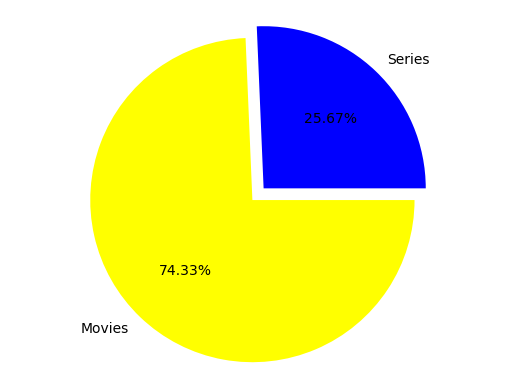

In [42]:
color = ['blue', 'yellow']
label = ['Series', 'Movies']
sizes = [netflix_df[netflix_df['Series or Movie'] == 'Series'].size, netflix_df[netflix_df['Series or Movie'] == 'Movie'].size]
explode = (0.1, 0)
fig, ax = plt.subplots()
ax.pie(sizes, explode, label, color, '%2.2f%%')
ax.axis('equal')
plt.show()

In [43]:
Language = netflix_df.Languages.str.get_dummies(',')
Lang = Language.columns.str.strip().values.tolist()
Language = netflix_df['Languages']
Language_Count = dict()
for i in Lang:
    p = Language.str.count(i).sum()
    Language_Count[i] = int(p)
print(len(Language_Count))

184


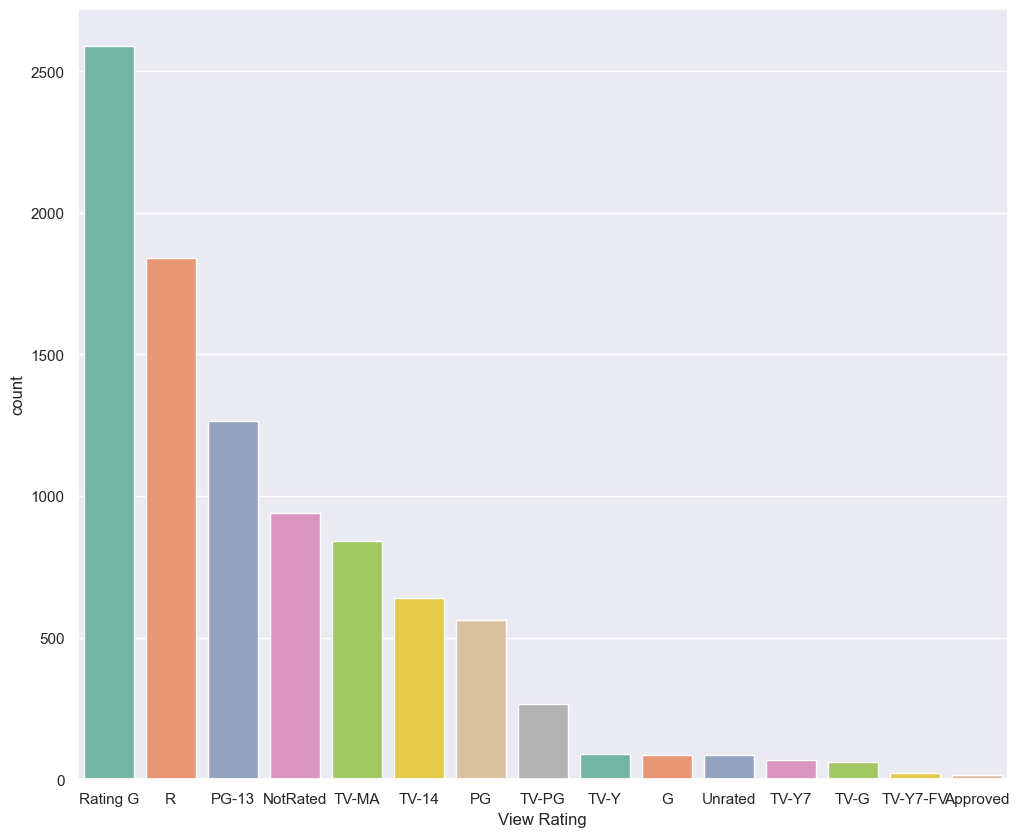

In [44]:
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(x="View Rating", data=netflix_df, palette="Set2", order=netflix_df['View Rating'].value_counts().index[0:15])

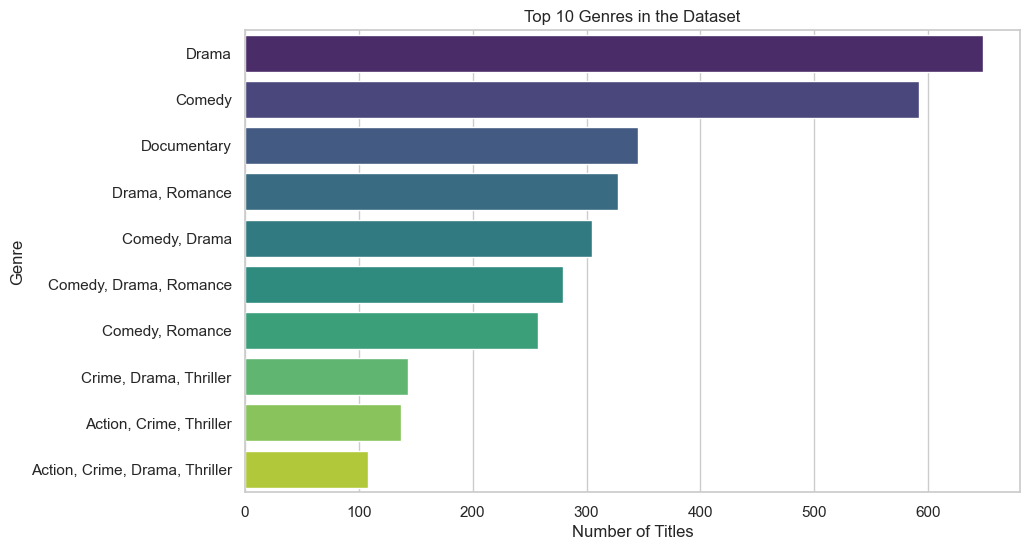

In [45]:
# Set seaborn style
sns.set(style="whitegrid")

# Genre Analysis
plt.figure(figsize=(10, 6))
genre_counts = netflix_df['Genre'].value_counts().head(10)
sns.barplot(x=genre_counts.values, y=genre_counts.index, palette="viridis")
plt.xlabel('Number of Titles')
plt.ylabel('Genre')
plt.title('Top 10 Genres in the Dataset')
plt.show()

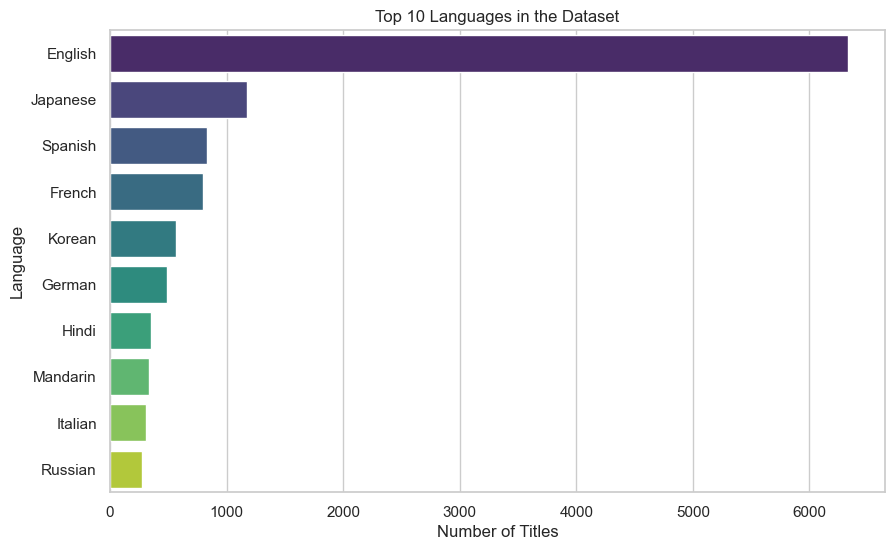

In [46]:
# Language Analysis
plt.figure(figsize=(10, 6))
language_counts = netflix_df['Languages'].str.split(', ').explode().value_counts().head(10)
sns.barplot(x=language_counts.values, y=language_counts.index, palette="viridis")
plt.xlabel('Number of Titles')
plt.ylabel('Language')
plt.title('Top 10 Languages in the Dataset')
plt.show()

C:\Users\GABBAR\AppData\Local\Temp\ipykernel_6612\207958307.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  netflix_df['Release Date'] = pd.to_datetime(netflix_df['Release Date'])


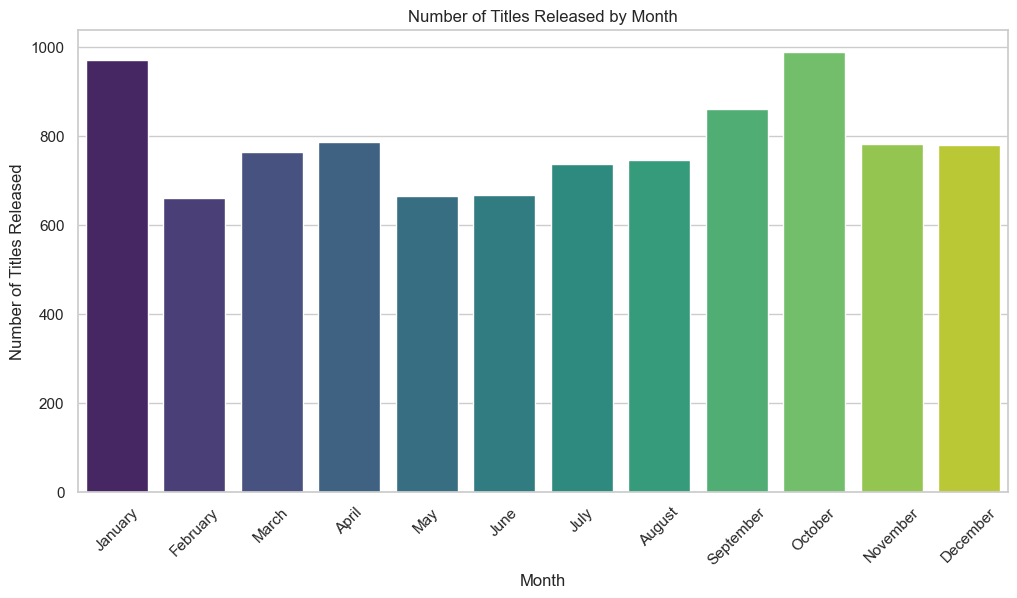

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'Release Date' column to datetime
netflix_df['Release Date'] = pd.to_datetime(netflix_df['Release Date'])

# Extract month names from the 'Release Date' column
netflix_df['Release Month'] = netflix_df['Release Date'].dt.month_name()

# Specify the order of months
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Count the number of titles released in each month
release_month_counts = netflix_df['Release Month'].value_counts().sort_index()

# Plotting the countplot with proper month order
plt.figure(figsize=(12, 6))
sns.countplot(x=netflix_df['Release Month'], data=netflix_df, palette="viridis", order=month_order)
plt.xlabel('Month')
plt.ylabel('Number of Titles Released')
plt.title('Number of Titles Released by Month')
plt.xticks(rotation=45)
plt.show()

C:\Users\GABBAR\AppData\Local\Temp\ipykernel_6612\2442851381.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=netflix_df, x='IMDb Score', bins=20, kde=True, palette="viridis")


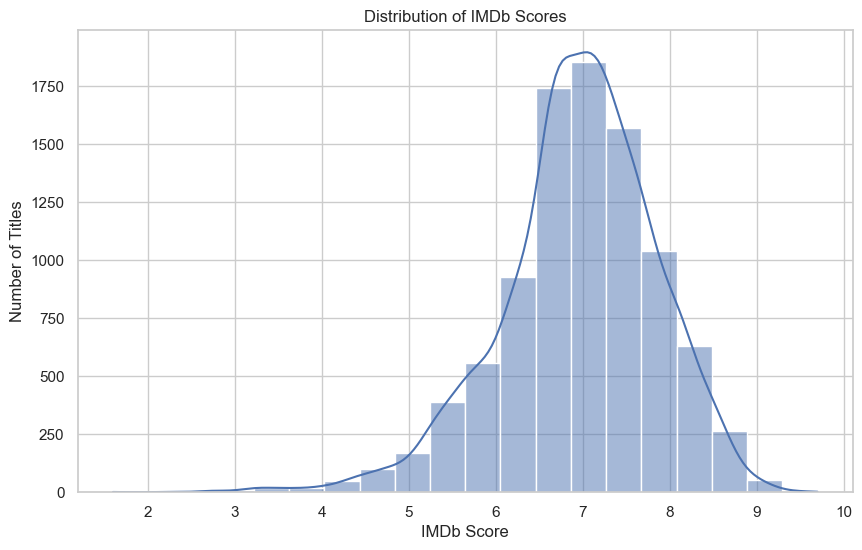

In [48]:
plt.figure(figsize=(10, 6))
sns.histplot(data=netflix_df, x='IMDb Score', bins=20, kde=True, palette="viridis")
plt.xlabel('IMDb Score')
plt.ylabel('Number of Titles')
plt.title('Distribution of IMDb Scores')
plt.show()


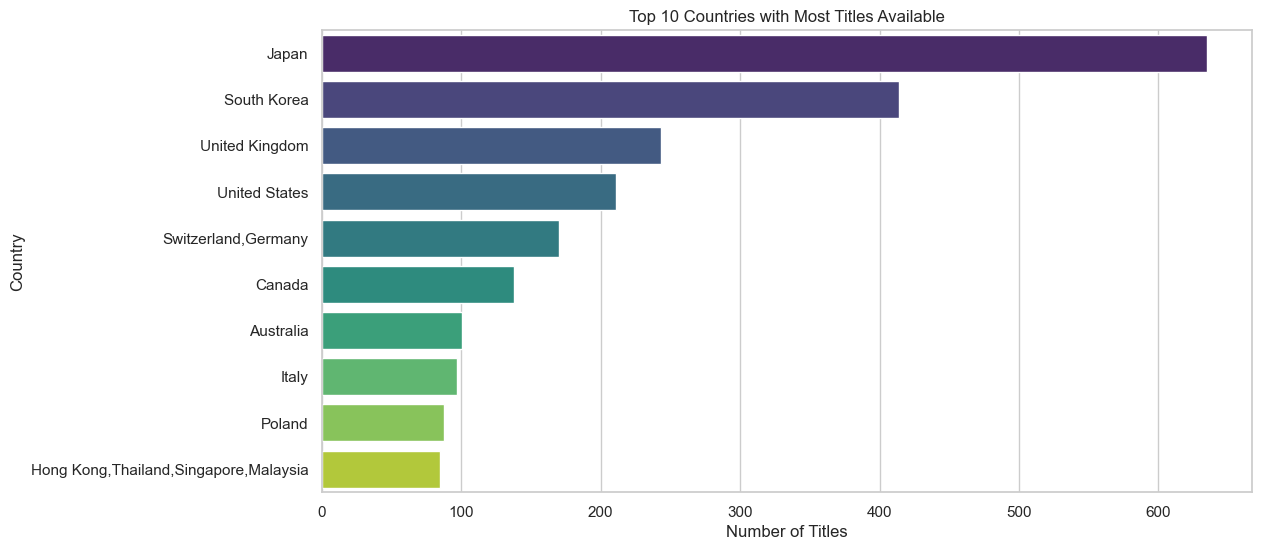

In [49]:
plt.figure(figsize=(12, 6))
country_counts = netflix_df['Country Availability'].str.split(', ').explode().value_counts().head(10)
sns.barplot(x=country_counts.values, y=country_counts.index, palette="viridis")
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.title('Top 10 Countries with Most Titles Available')
plt.show()

C:\Users\GABBAR\AppData\Local\Temp\ipykernel_6612\2586975820.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=netflix_df, x='Runtime', bins=20, kde=True, palette="viridis")


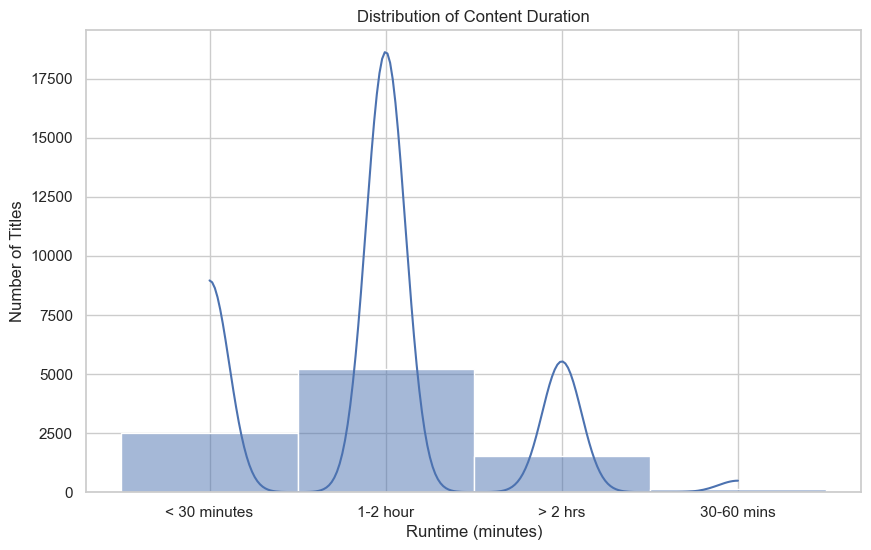

In [50]:
plt.figure(figsize=(10, 6))
sns.histplot(data=netflix_df, x='Runtime', bins=20, kde=True, palette="viridis")
plt.xlabel('Runtime (minutes)')
plt.ylabel('Number of Titles')
plt.title('Distribution of Content Duration')
plt.show()


C:\Users\GABBAR\AppData\Local\Temp\ipykernel_6612\209158632.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='Boxoffice', y='IMDb Votes', data=netflix_df, palette="viridis")


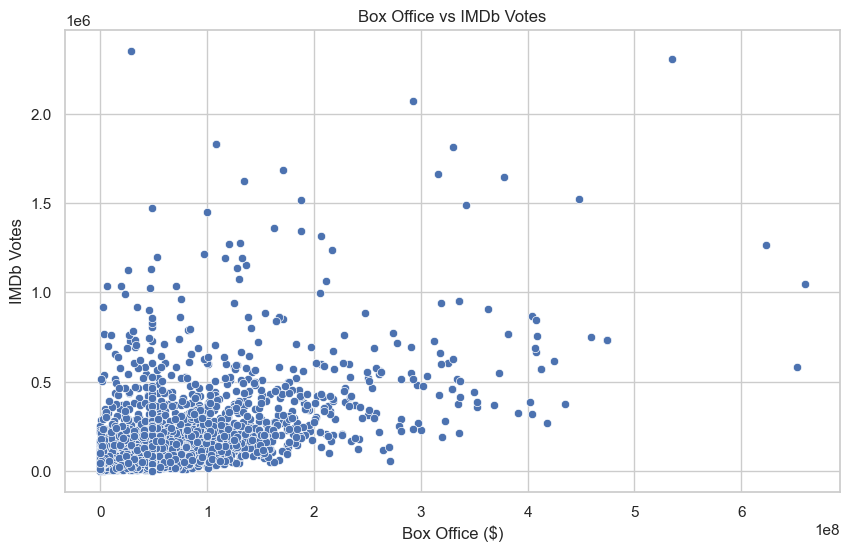

In [51]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Boxoffice', y='IMDb Votes', data=netflix_df, palette="viridis")
plt.xlabel('Box Office ($)')
plt.ylabel('IMDb Votes')
plt.title('Box Office vs IMDb Votes')
plt.show()


C:\Users\GABBAR\AppData\Local\Temp\ipykernel_6612\4222466809.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Release Month', y='Boxoffice', data=netflix_df, ci=None, sort=False)


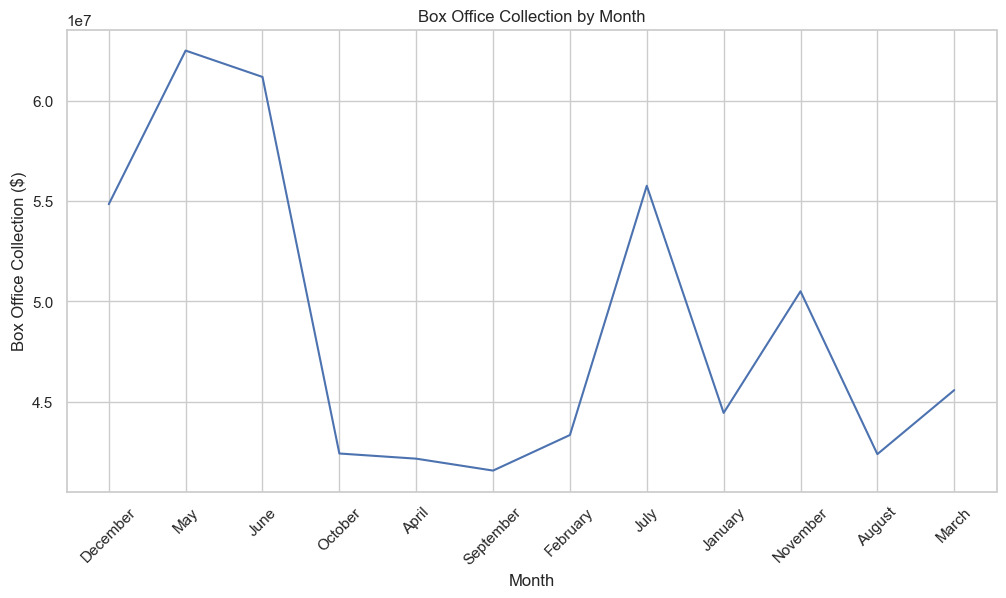

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the box office collection by month using a line plot with sorting disabled
plt.figure(figsize=(12, 6))
sns.lineplot(x='Release Month', y='Boxoffice', data=netflix_df, ci=None, sort=False)
plt.xlabel('Month')
plt.ylabel('Box Office Collection ($)')
plt.title('Box Office Collection by Month')
plt.xticks(rotation=45)
plt.show()


C:\Users\GABBAR\AppData\Local\Temp\ipykernel_6612\23084299.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  awards_df['Genre'] = awards_df['Genre'].str.split(', ')


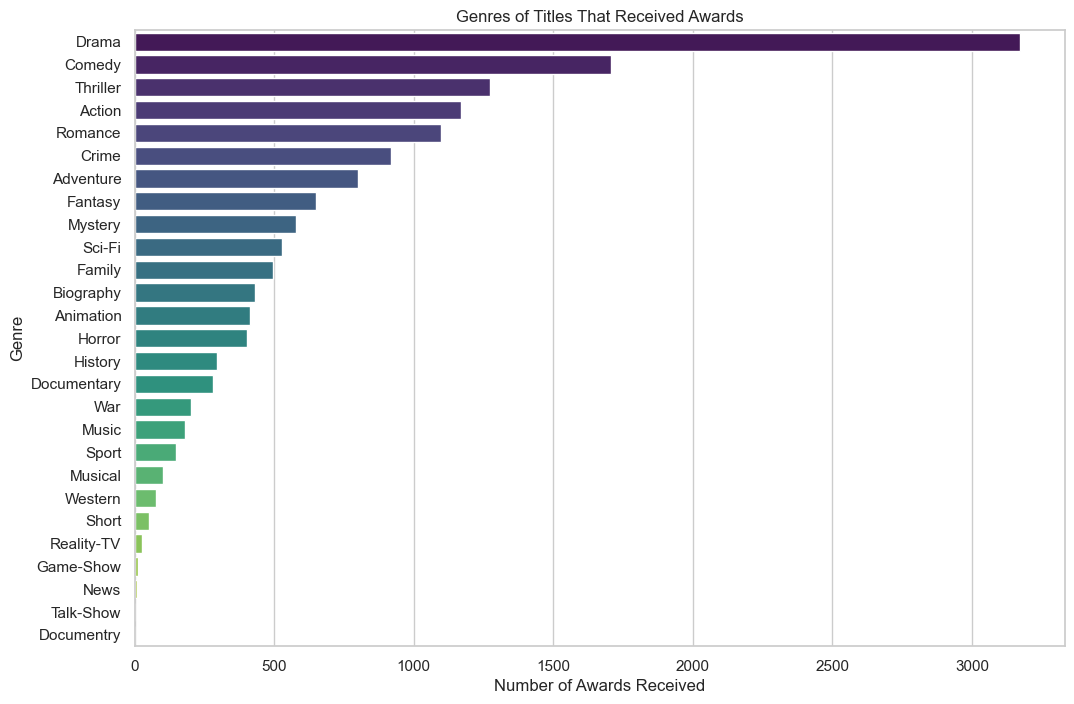

In [53]:
# Filter the dataframe to include only titles that have received awards
awards_df = netflix_df[netflix_df['Awards Received'] != 'Not Received']

# Split the genres and explode them to separate rows
awards_df['Genre'] = awards_df['Genre'].str.split(', ')
awards_df = awards_df.explode('Genre')

# Count the occurrences of each genre
genre_awards_counts = awards_df['Genre'].value_counts()

# Plot the count of awards received for each genre
plt.figure(figsize=(12, 8))
sns.barplot(x=genre_awards_counts.values, y=genre_awards_counts.index, palette="viridis")
plt.xlabel('Number of Awards Received')
plt.ylabel('Genre')
plt.title('Genres of Titles That Received Awards')
plt.show()


C:\Users\GABBAR\AppData\Local\Temp\ipykernel_6612\1677684354.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix_top_genres['Genre'] = netflix_top_genres['Genre'].str.split(', ')


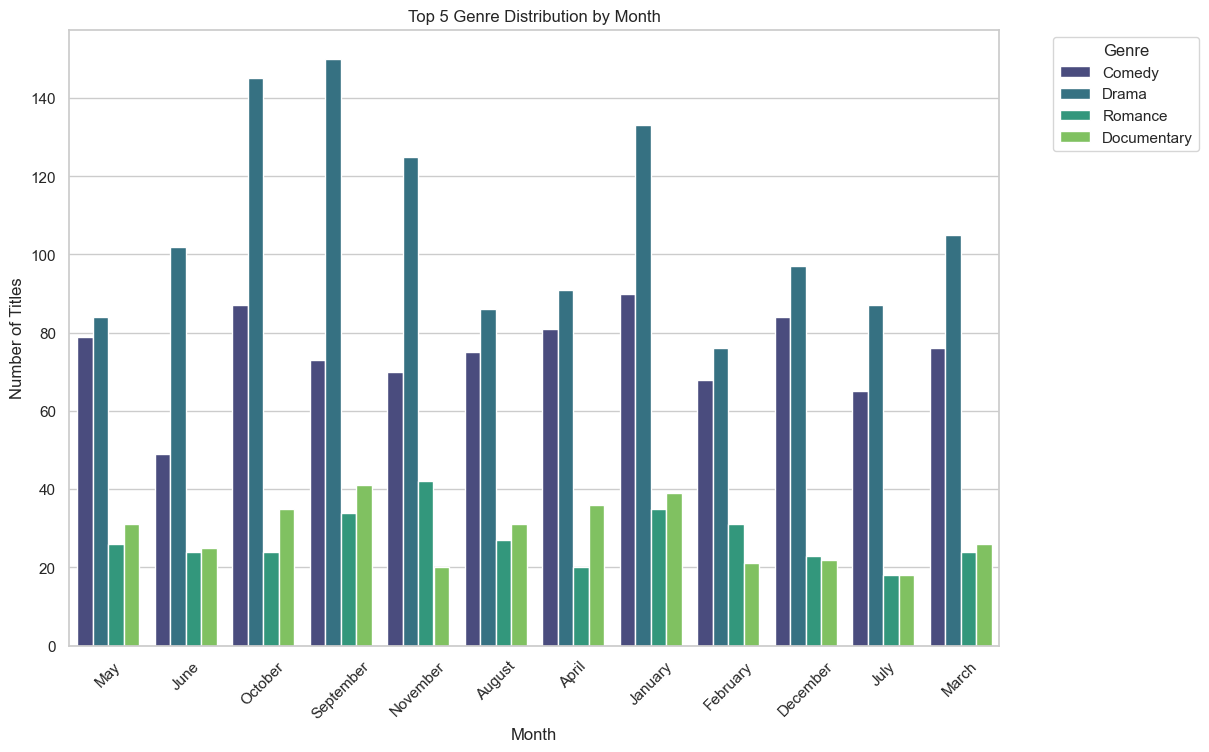

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get the top 5 genres
top_genres = netflix_df['Genre'].value_counts().head(5).index

# Filter the dataset to include only the top 5 genres
netflix_top_genres = netflix_df[netflix_df['Genre'].isin(top_genres)]

# Split the genres and explode them to separate rows
netflix_top_genres['Genre'] = netflix_top_genres['Genre'].str.split(', ')
netflix_top_genres = netflix_top_genres.explode('Genre')

# Plotting the genre distribution by month for the top 5 genres
plt.figure(figsize=(12, 8))
sns.countplot(x='Release Month', hue='Genre', data=netflix_top_genres, palette="viridis")
plt.xlabel('Month')
plt.ylabel('Number of Titles')
plt.title('Top 5 Genre Distribution by Month')
plt.xticks(rotation=45)
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


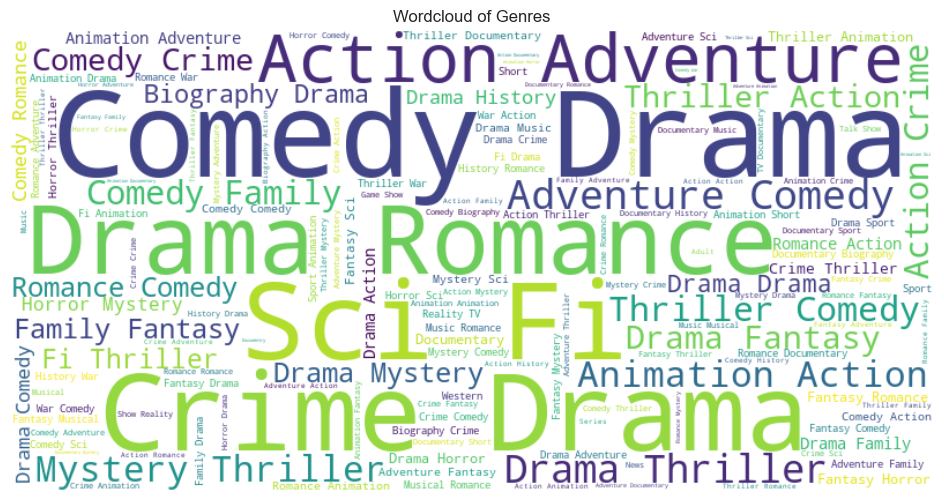

In [55]:
# Generate wordcloud
text = ' '.join(netflix_df['Genre'].astype(str))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Plot wordcloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Wordcloud of Genres')
plt.show()

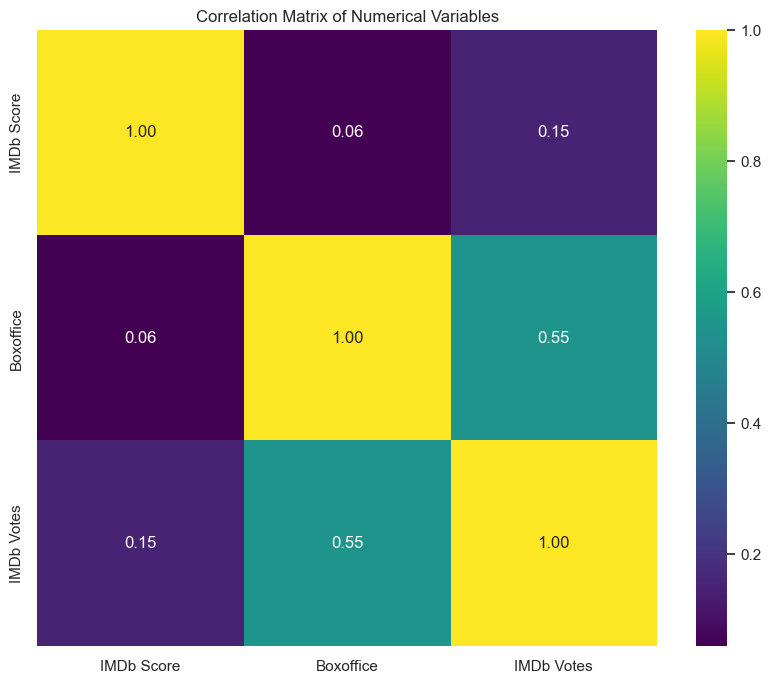

In [56]:
# Selecting only the numerical columns for correlation calculation
numerical_columns = netflix_df.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(10, 8))
sns.heatmap(numerical_columns.corr(), annot=True, cmap='viridis', fmt=".2f")
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

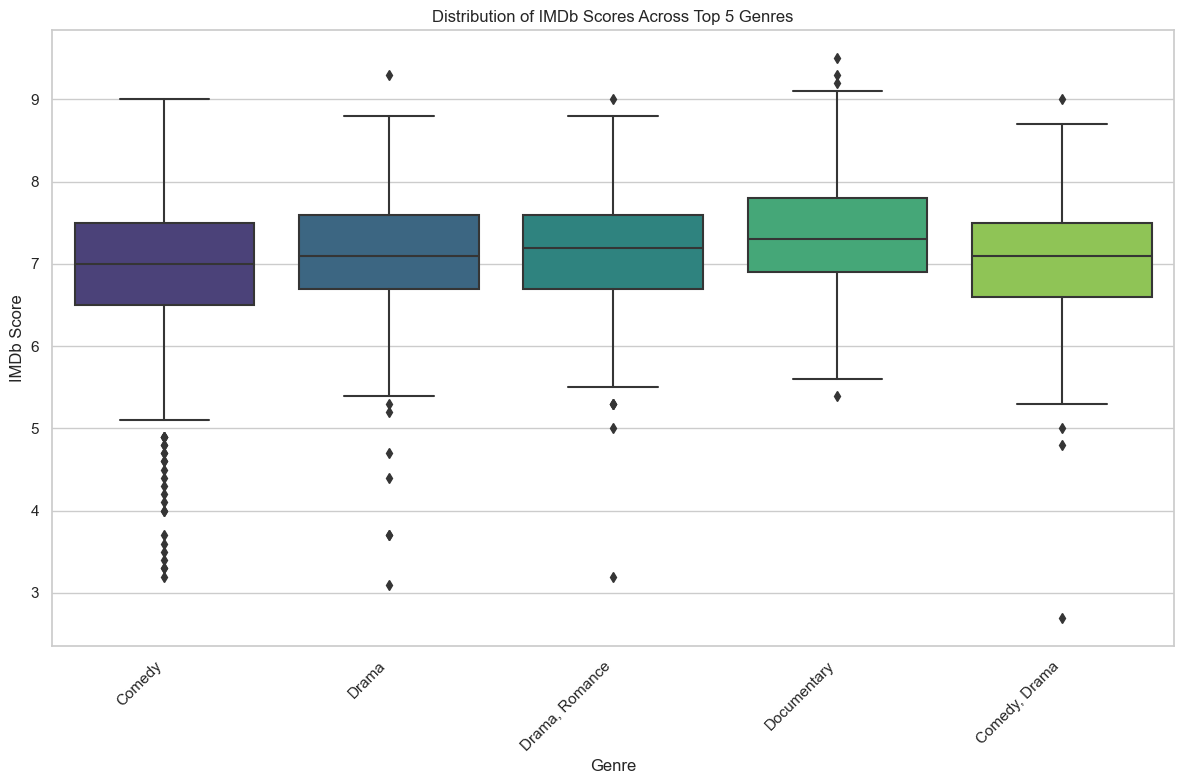

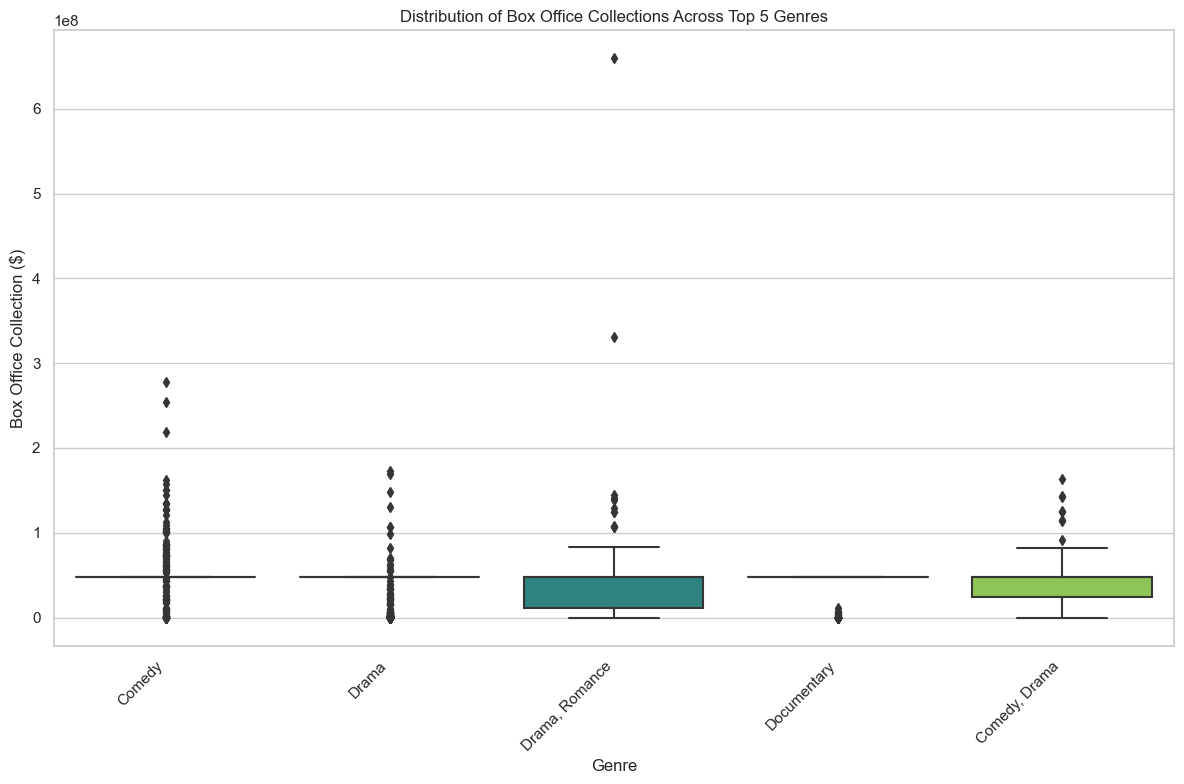

In [57]:
top_genres = netflix_df['Genre'].value_counts().head(5).index

plt.figure(figsize=(12, 8))
sns.boxplot(x='Genre', y='IMDb Score', data=netflix_df[netflix_df['Genre'].isin(top_genres)], palette='viridis')
plt.xlabel('Genre')
plt.ylabel('IMDb Score')
plt.title('Distribution of IMDb Scores Across Top 5 Genres')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 8))
sns.boxplot(x='Genre', y='Boxoffice', data=netflix_df[netflix_df['Genre'].isin(top_genres)], palette='viridis')
plt.xlabel('Genre')
plt.ylabel('Box Office Collection ($)')
plt.title('Distribution of Box Office Collections Across Top 5 Genres')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


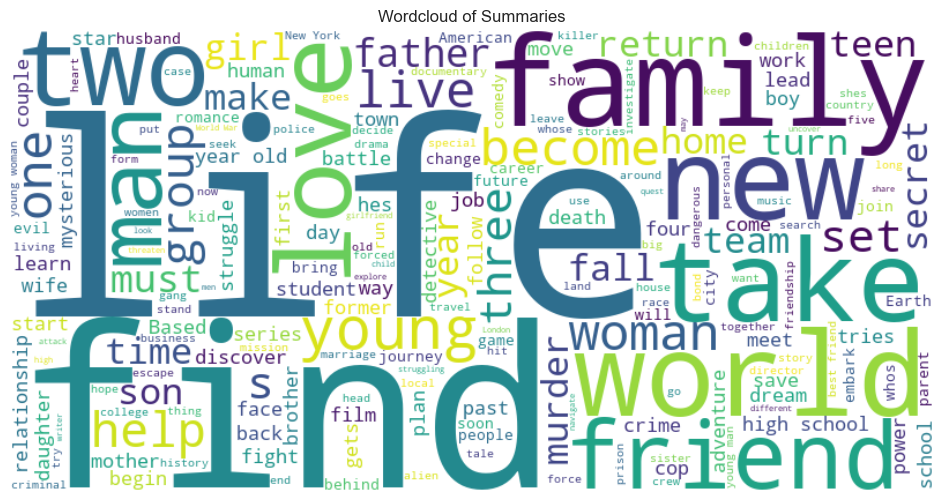

In [58]:
# Combine all summaries into a single string
all_summaries = ' '.join(netflix_df['Summary'].astype(str))

# Generate wordcloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_summaries)

# Plot wordcloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Wordcloud of Summaries')
plt.show()